In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import YearLocator, DateFormatter
import seaborn as sns
import numpy as np

# Preprocessing

In [2]:
df= pd.read_csv('data/train.csv', delimiter=',')

In [3]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
df

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       ID00001       0.515874        0.05             0.644231           C1   
1       ID00002       0.672619        0.02             0.375000           C2   
2       ID00003       0.841110        0.02             0.384615           C3   
3       ID00004       0.900277        0.11             0.432692           C4   
4       ID00005       0.596403        0.11             0.634615           C5   
...         ...            ...         ...                  ...          ...   
58587   ID58588       0.355089        0.13             0.644231           C8   
58588   ID58589       1.199642        0.02             0.519231          C14   
58589   ID58590       1.162273        0.05             0.451923           C5   
58590   ID58591       1.236307        0.14             0.557692           C8   
58591   ID58592       0.124429        0.02             0.442308           C8   

       population_density  make segment model fuel_type     max_torque  \
0                    4990     1       A    M1       CNG   60Nm@3500rpm   
1                   27003     1       A    M1       CNG   60Nm@3500rpm   
2                    4076     1       A    M1       CNG   60Nm@3500rpm   
3                   21622     1      C1    M2    Petrol  113Nm@4400rpm   
4                   34738     2       A    M3    Petrol   91Nm@4250rpm   
...                   ...   ...     ...   ...       ...            ...   
58587                8794     2       A    M3    Petrol   91Nm@4250rpm   
58588                7788     1       A    M1       CNG   60Nm@3500rpm   
58589               34738     1       A    M1       CNG   60Nm@3500rpm   
58590                8794     1      B2    M6    Petrol  113Nm@4400rpm   
58591                8794     3      C2    M4    Diesel  250Nm@2750rpm   

               max_power         engine_type  airbags is_esc  \
0       40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1       40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2       40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3       88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4       67.06bhp@5500rpm             1.0 SCe        2     No   
...                  ...                 ...      ...    ...   
58587   67.06bhp@5500rpm             1.0 SCe        2     No   
58588   40.36bhp@6000rpm   F8D Petrol Engine        2     No   
58589   40.36bhp@6000rpm   F8D Petrol Engine        2     No   
58590   88.50bhp@6000rpm   K Series Dual jet        2     No   
58591  113.45bhp@4000rpm       1.5 L U2 CRDi        6    Yes   

      is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                         No      No                Yes                No   
1                         No      No                Yes                No   
2                         No      No                Yes                No   
3                        Yes      No                Yes               Yes   
4                         No      No                 No               Yes   
...                      ...     ...                ...               ...   
58587                     No      No                 No               Yes   
58588                     No      No                Yes                No   
58589                     No      No                Yes                No   
58590                    Yes      No                Yes                No   
58591                    Yes     Yes                Yes               Yes   

      rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0                 Drum           796         3            Manual         5   
1                 Drum           796         3            Manual         5   
2                 Drum           796         3            Manual         5   
3                 Drum          1197         4         Automatic         5   
4                 Drum           999         3         Automatic        

In [5]:
ordinal_col = ['rear_brakes_type', 'engine_type', 'fuel_type', 'model', 'segment', 'area_cluster']

for column in ordinal_col:
    df = pd.get_dummies(df, columns=[column], prefix=column)

In [6]:
other_ordinal_col = ['max_torque', 'max_power']

df[['max_torque_Nm', 'max_torque_rpm']] = df["max_torque"].apply(lambda x: pd.Series(str(x).split("@")))
df.drop(["max_torque"], axis=1, inplace= True)
df['max_torque_Nm'] = df['max_torque_Nm'].str[:-2].astype(float)
df['max_torque_rpm'] = df['max_torque_rpm'].str[:-3].astype(int)

df[['max_power_bhp', 'max_power_rpm']] = df["max_power"].apply(lambda x: pd.Series(str(x).split("@")))
df.drop(["max_power"], axis=1, inplace= True)
df['max_power_rpm'] = df['max_power_rpm'].str[:-3].astype(int)
df['max_power_bhp'] = df['max_power_bhp'].str[:-3].astype(float)

In [7]:
df['is_parking_camera'].map({'Yes': 1, 'No': 0})

0        0
1        0
2        0
3        1
4        1
        ..
58587    1
58588    0
58589    0
58590    0
58591    1
Name: is_parking_camera, Length: 58592, dtype: int64

In [8]:
df.is_parking_camera

0         No
1         No
2         No
3        Yes
4        Yes
        ... 
58587    Yes
58588     No
58589     No
58590     No
58591    Yes
Name: is_parking_camera, Length: 58592, dtype: object

In [9]:
yes_no_col = ['is_parking_sensors', 'is_adjustable_steering', 
               'is_esc', 'is_tpms', 'is_parking_camera','is_front_fog_lights', 
               'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 
               'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw',
               'is_speed_alert'] 

for column in yes_no_col:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [10]:
other_binary_col = ['steering_type', 'transmission_type']

df['transmission_type'] = df['transmission_type'].map({'Manual' : 0, 'Automatic' : 1})
df['steering_type'] = df['steering_type'].map({'Manual' : 1, 'Power' : 2, 'Electric': 3})

In [11]:
df.transmission_type

0        0
1        0
2        0
3        1
4        1
        ..
58587    1
58588    0
58589    0
58590    0
58591    1
Name: transmission_type, Length: 58592, dtype: int64

In [12]:
numerical_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
                     'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius',
                     'length', 'width', 'height', 'gross_weight', 'ncap_rating']

numerical_df = df.set_index('policy_id')

for column in numerical_df.columns:
    if numerical_df[column].dtype == 'bool':
        numerical_df[column] = numerical_df[column].astype(int)

In [13]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58592 entries, ID00001 to ID58592
Data columns (total 94 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  int64  
 4   make                                   58592 non-null  int64  
 5   airbags                                58592 non-null  int64  
 6   is_esc                                 58592 non-null  int64  
 7   is_adjustable_steering                 58592 non-null  int64  
 8   is_tpms                                58592 non-null  int64  
 9   is_parking_sensors                     58592 non-null  int64  
 10  is_parking_camera                      58592 non-null  int64  
 11 

In [ ]:
numerical_df

policy_tenure  age_of_car  age_of_policyholder  population_density  \
policy_id                                                                       
ID00001         0.515874        0.05             0.644231                4990   
ID00002         0.672619        0.02             0.375000               27003   
ID00003         0.841110        0.02             0.384615                4076   
ID00004         0.900277        0.11             0.432692               21622   
ID00005         0.596403        0.11             0.634615               34738   
...                  ...         ...                  ...                 ...   
ID58588         0.355089        0.13             0.644231                8794   
ID58589         1.199642        0.02             0.519231                7788   
ID58590         1.162273        0.05             0.451923               34738   
ID58591         1.236307        0.14             0.557692                8794   
ID58592         0.124429        0.02             0.442308                8794   

           make  airbags  is_esc  is_adjustable_steering  is_tpms  \
policy_id                                                           
ID00001       1        2       0                       0        0   
ID00002       1        2       0                       0        0   
ID00003       1        2       0                       0        0   
ID00004       1        2       1                       1        0   
ID00005       2        2       0                       0        0   
...         ...      ...     ...                     ...      ...   
ID58588       2        2       0                       0        0   
ID58589       1        2       0                       0        0   
ID58590       1        2       0                       0        0   
ID58591       1        2       0                       1        0   
ID58592       3        6       1                       1        1   

           is_parking_sensors  is_parking_camera  displacement  cylinder  \
policy_id                                                                  
ID00001                     1                  0           796         3   
ID00002                     1                  0           796         3   
ID00003                     1                  0           796         3   
ID00004                     1                  1          1197         4   
ID00005                     0                  1           999         3   
...                       ...                ...           ...       ...   
ID58588                     0                  1           999         3   
ID58589                     1                  0           796         3   
ID58590                     1                  0           796         3   
ID58591                     1                  0          1197         4   
ID58592                     1                  1          1493         4   

           transmission_type  gear_box  steering_type  turning_radius  length  \
policy_id                                                                       
ID00001                    0         5              2             4.6    3445   
ID00002                    0         5              2             4.6    3445   
ID00003                    0         5              2             4.6    3445   
ID00004                    1         5              3             4.8    3995   
ID00005                    1         5              3             5.0    3731   
...                      ...       ...            ...             ...     ...   
ID58588                    1         5              3             5.0    3731   
ID58589                    0         5              2             4.6    3445   
ID58590                    0         5              2             4.6    3445   
ID58591                    0         5              3             4.8    3845   
ID58592                    1         6              2             5.2    4300   

           width

# Statistical Analysis

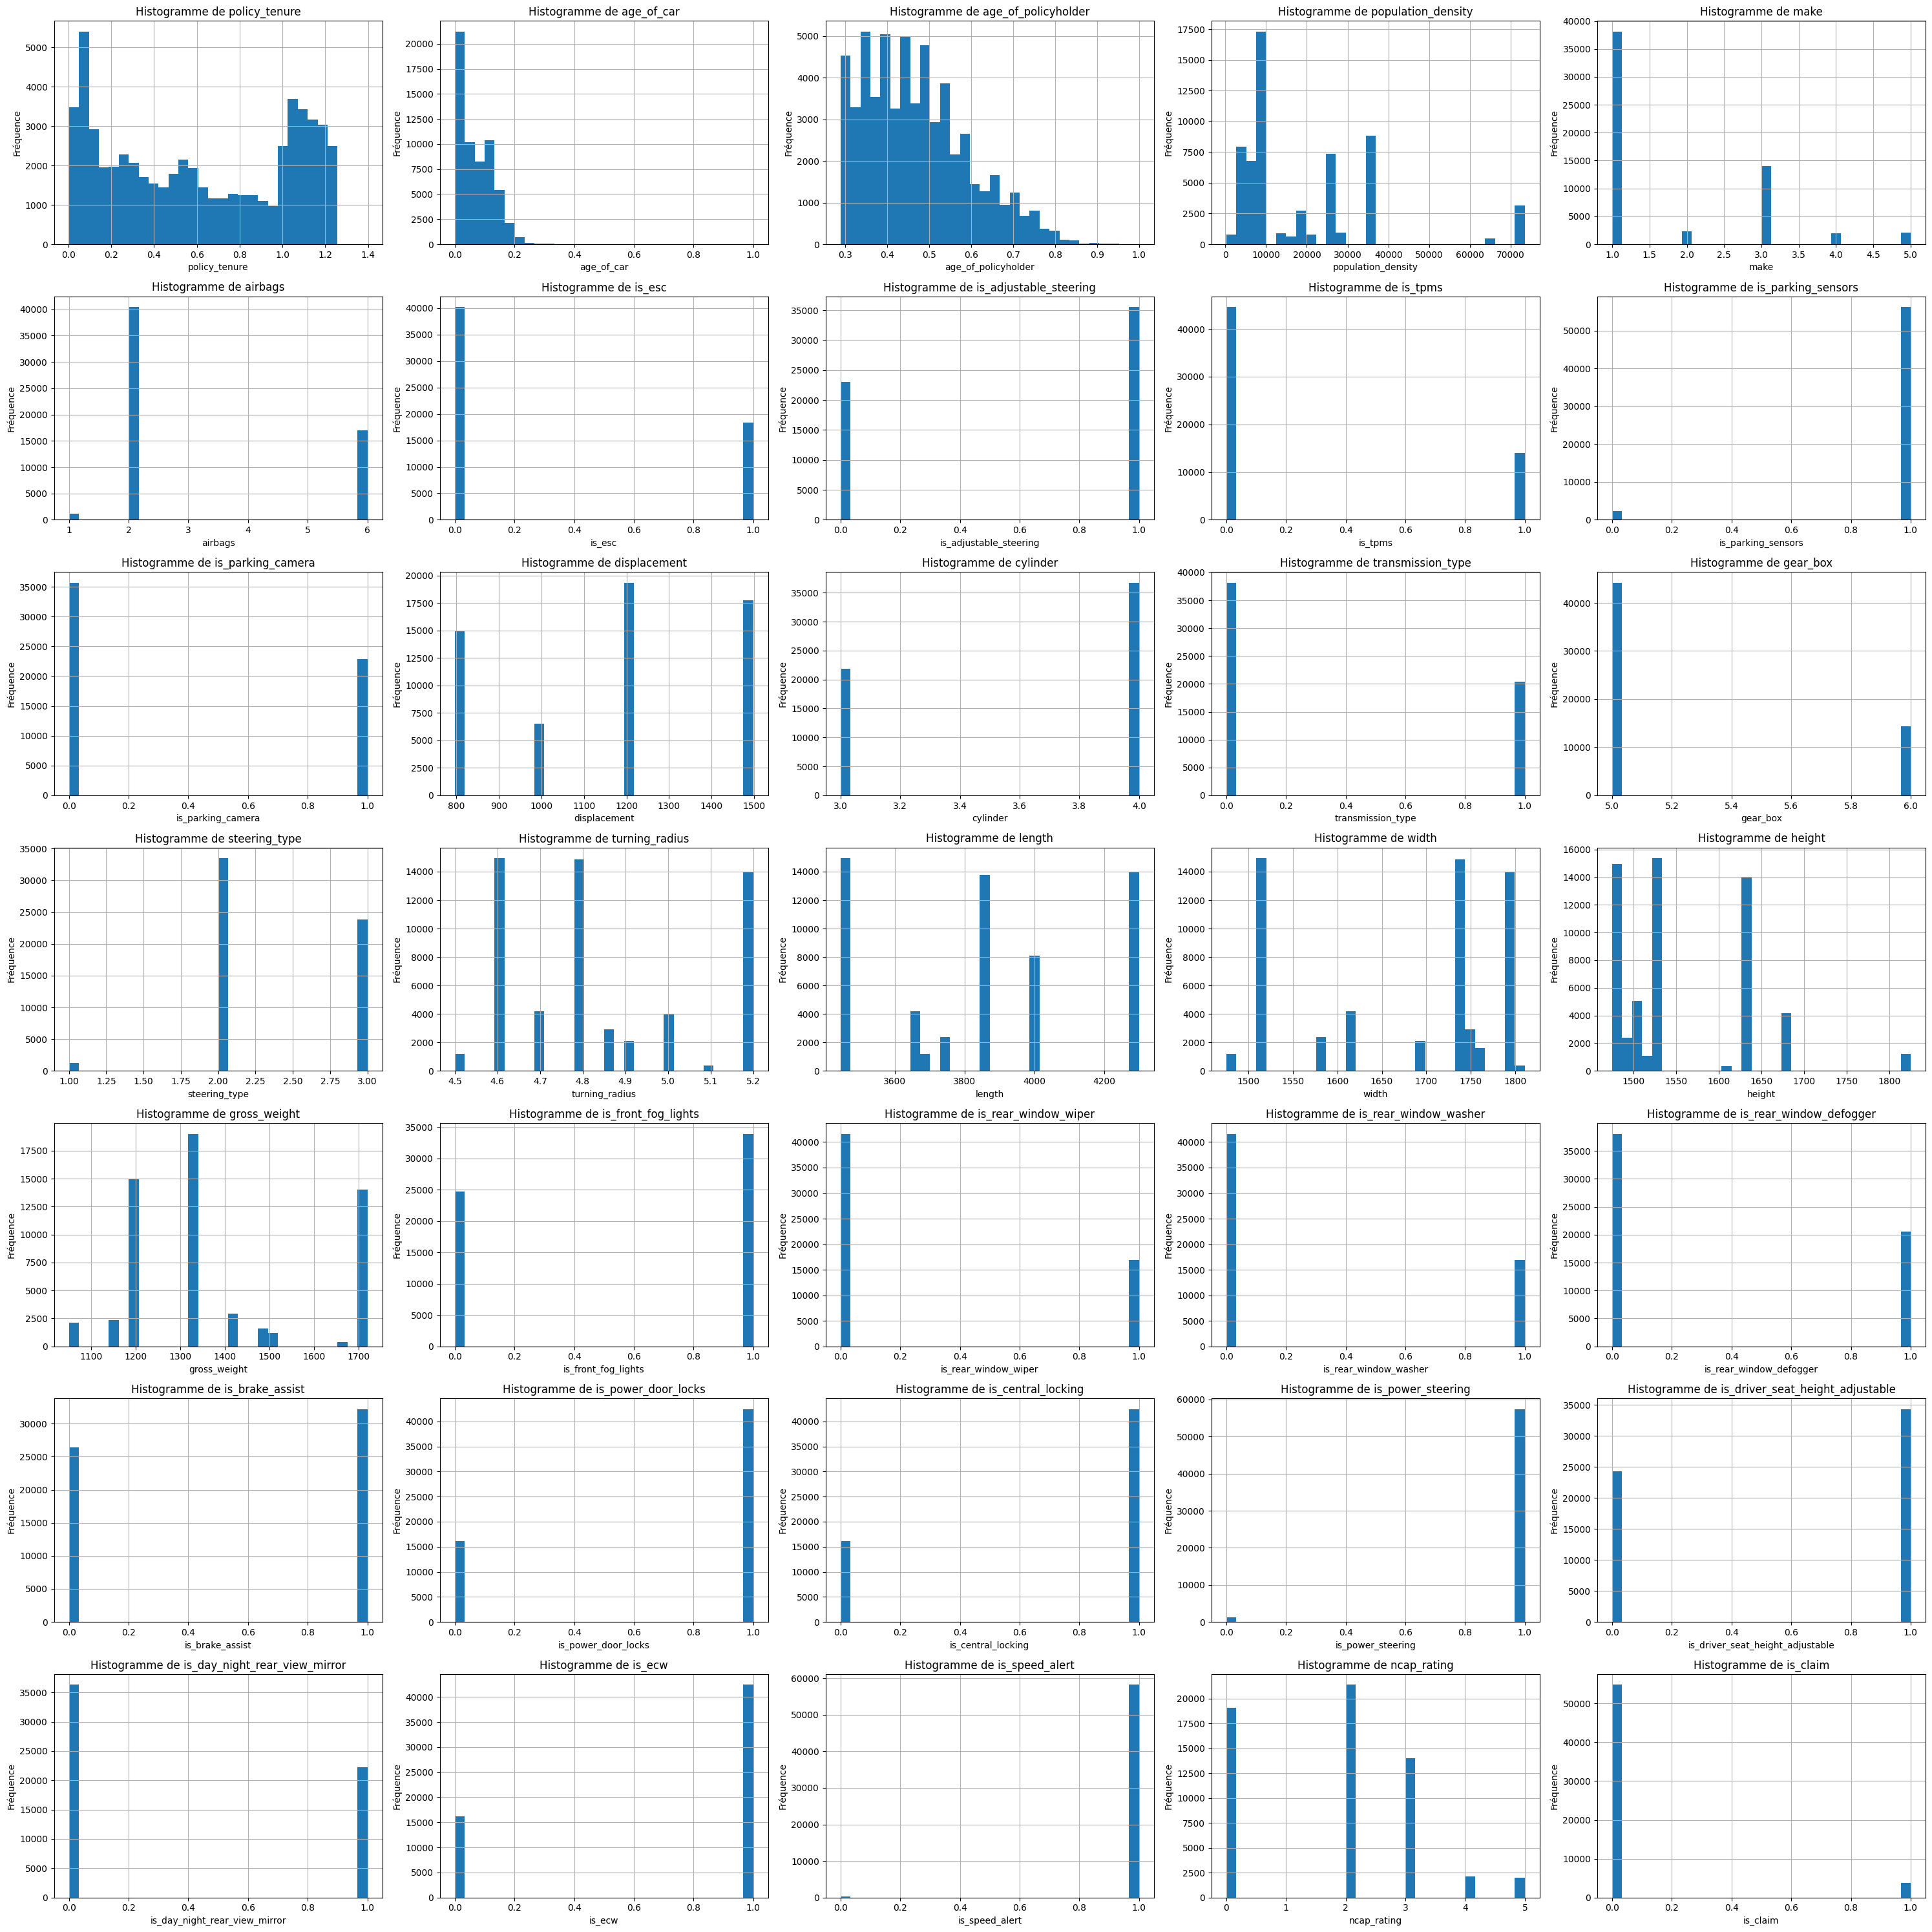

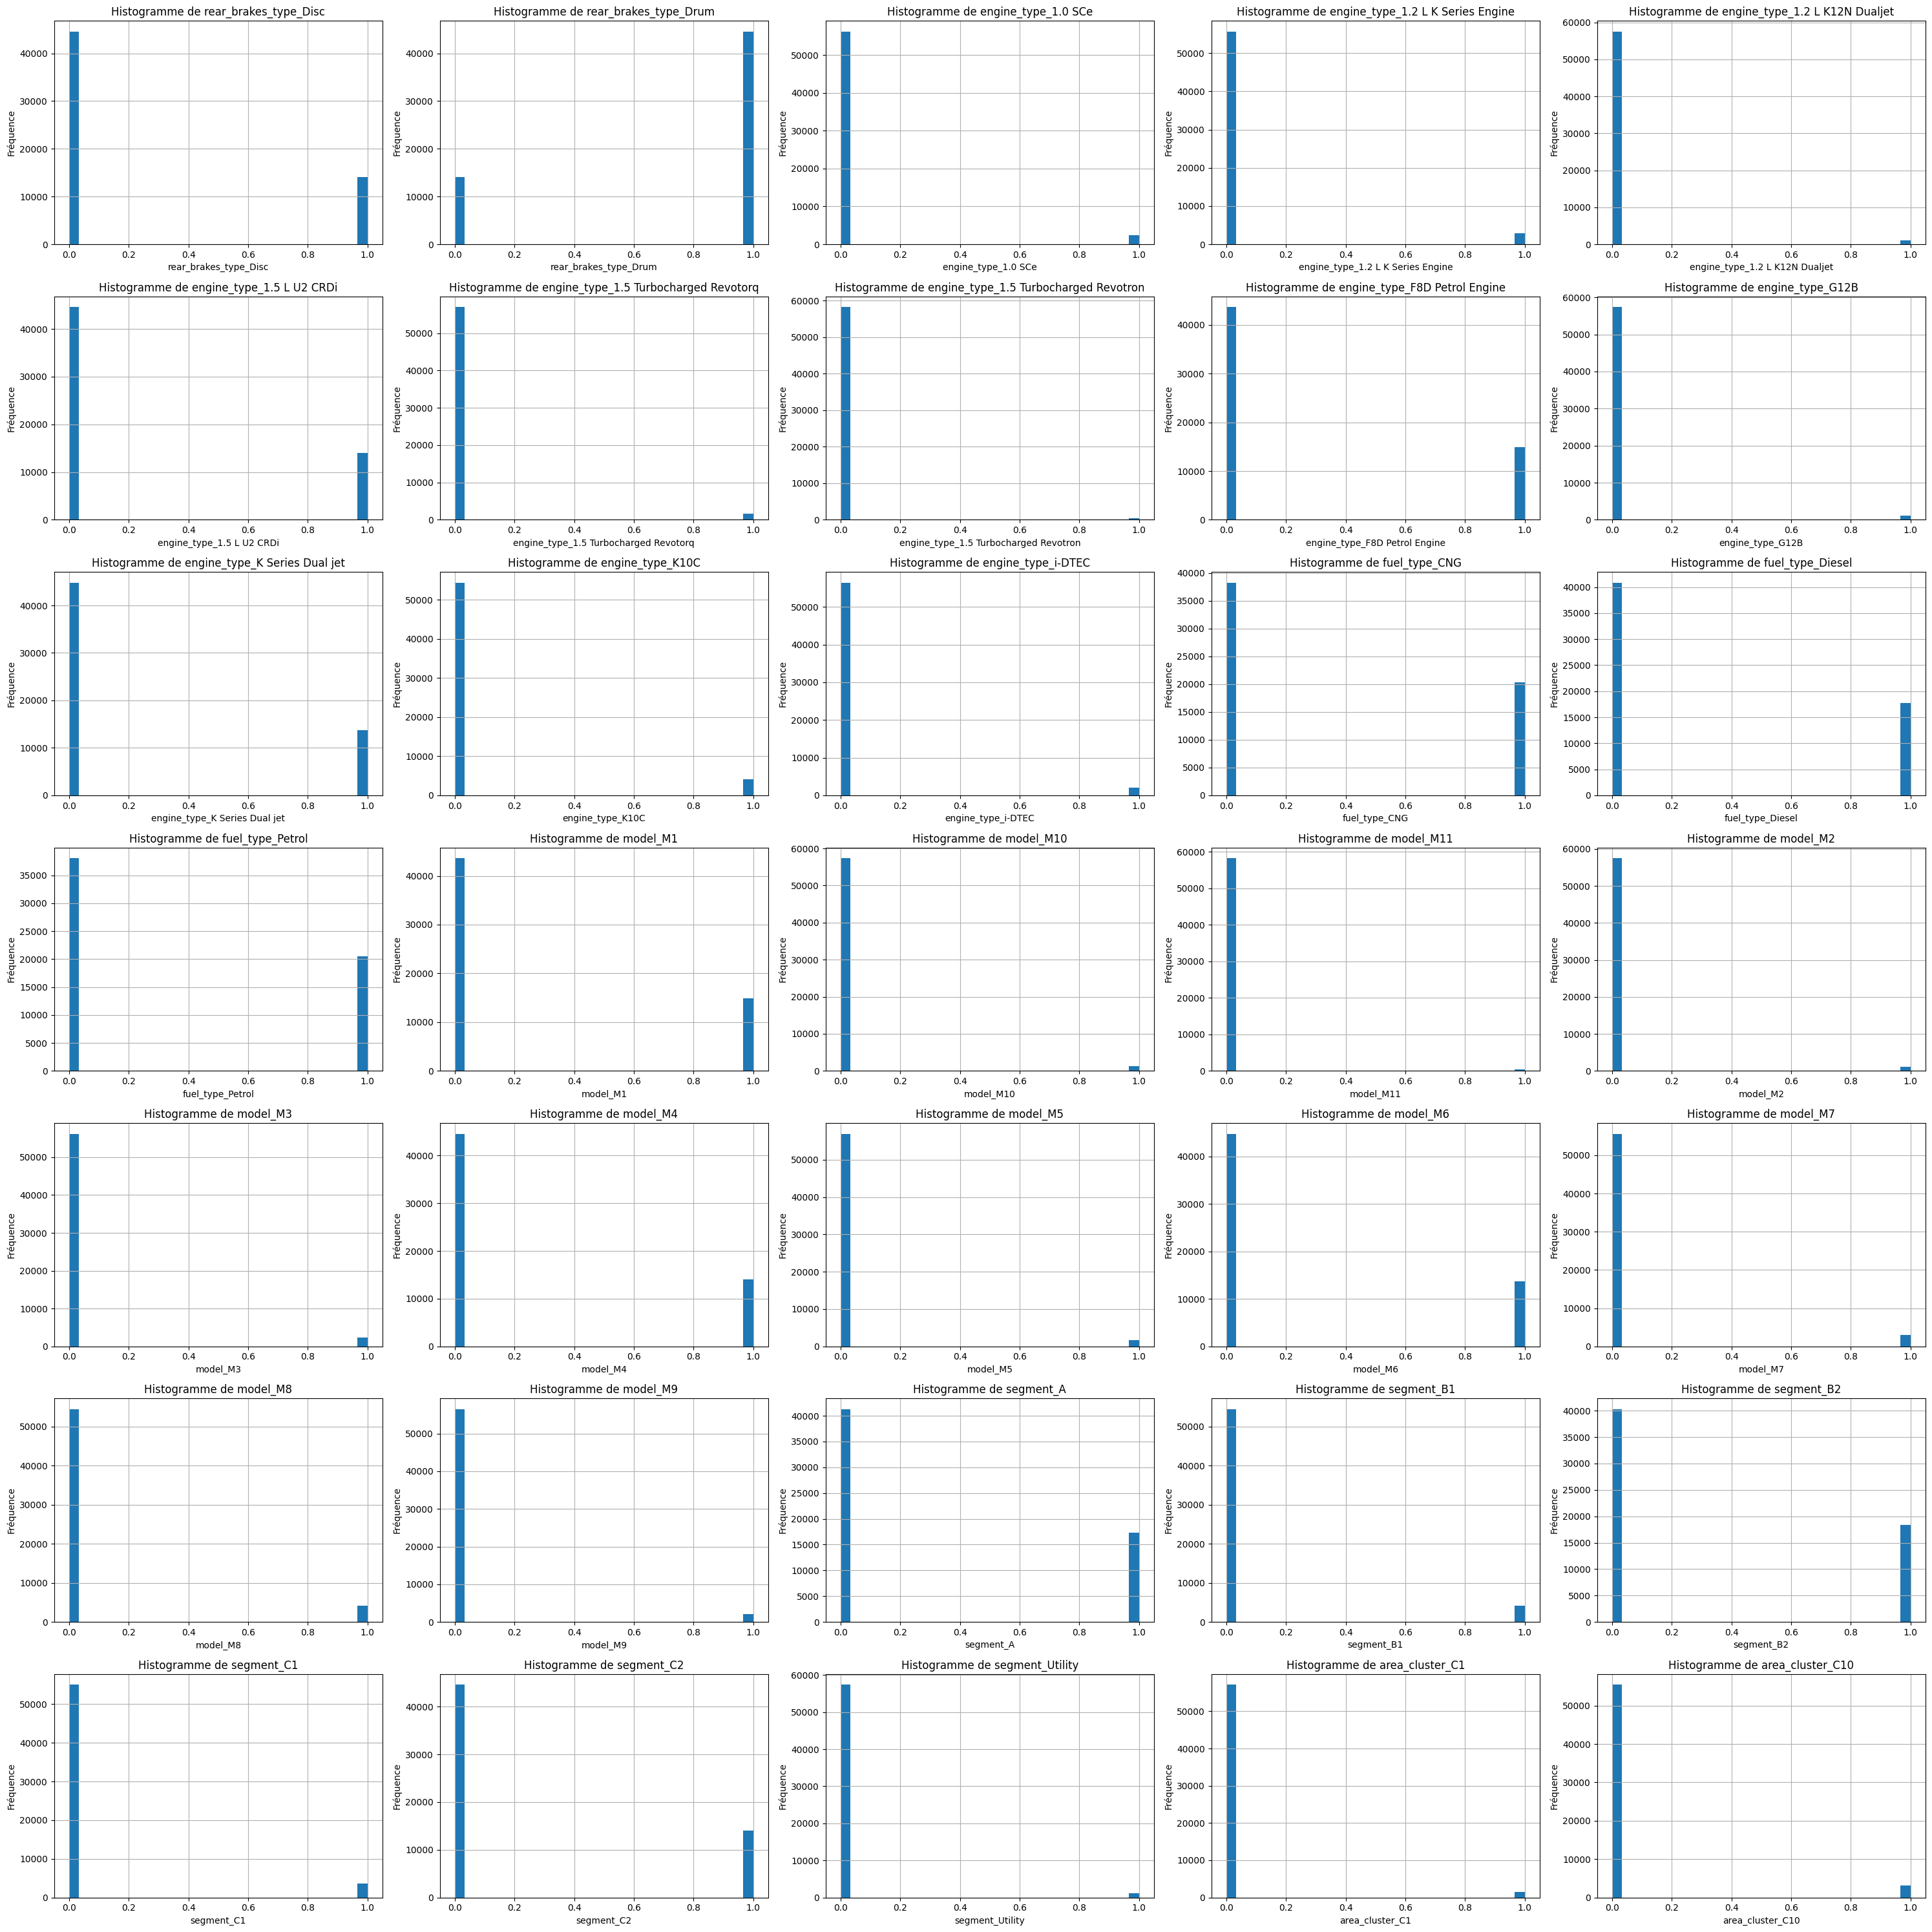

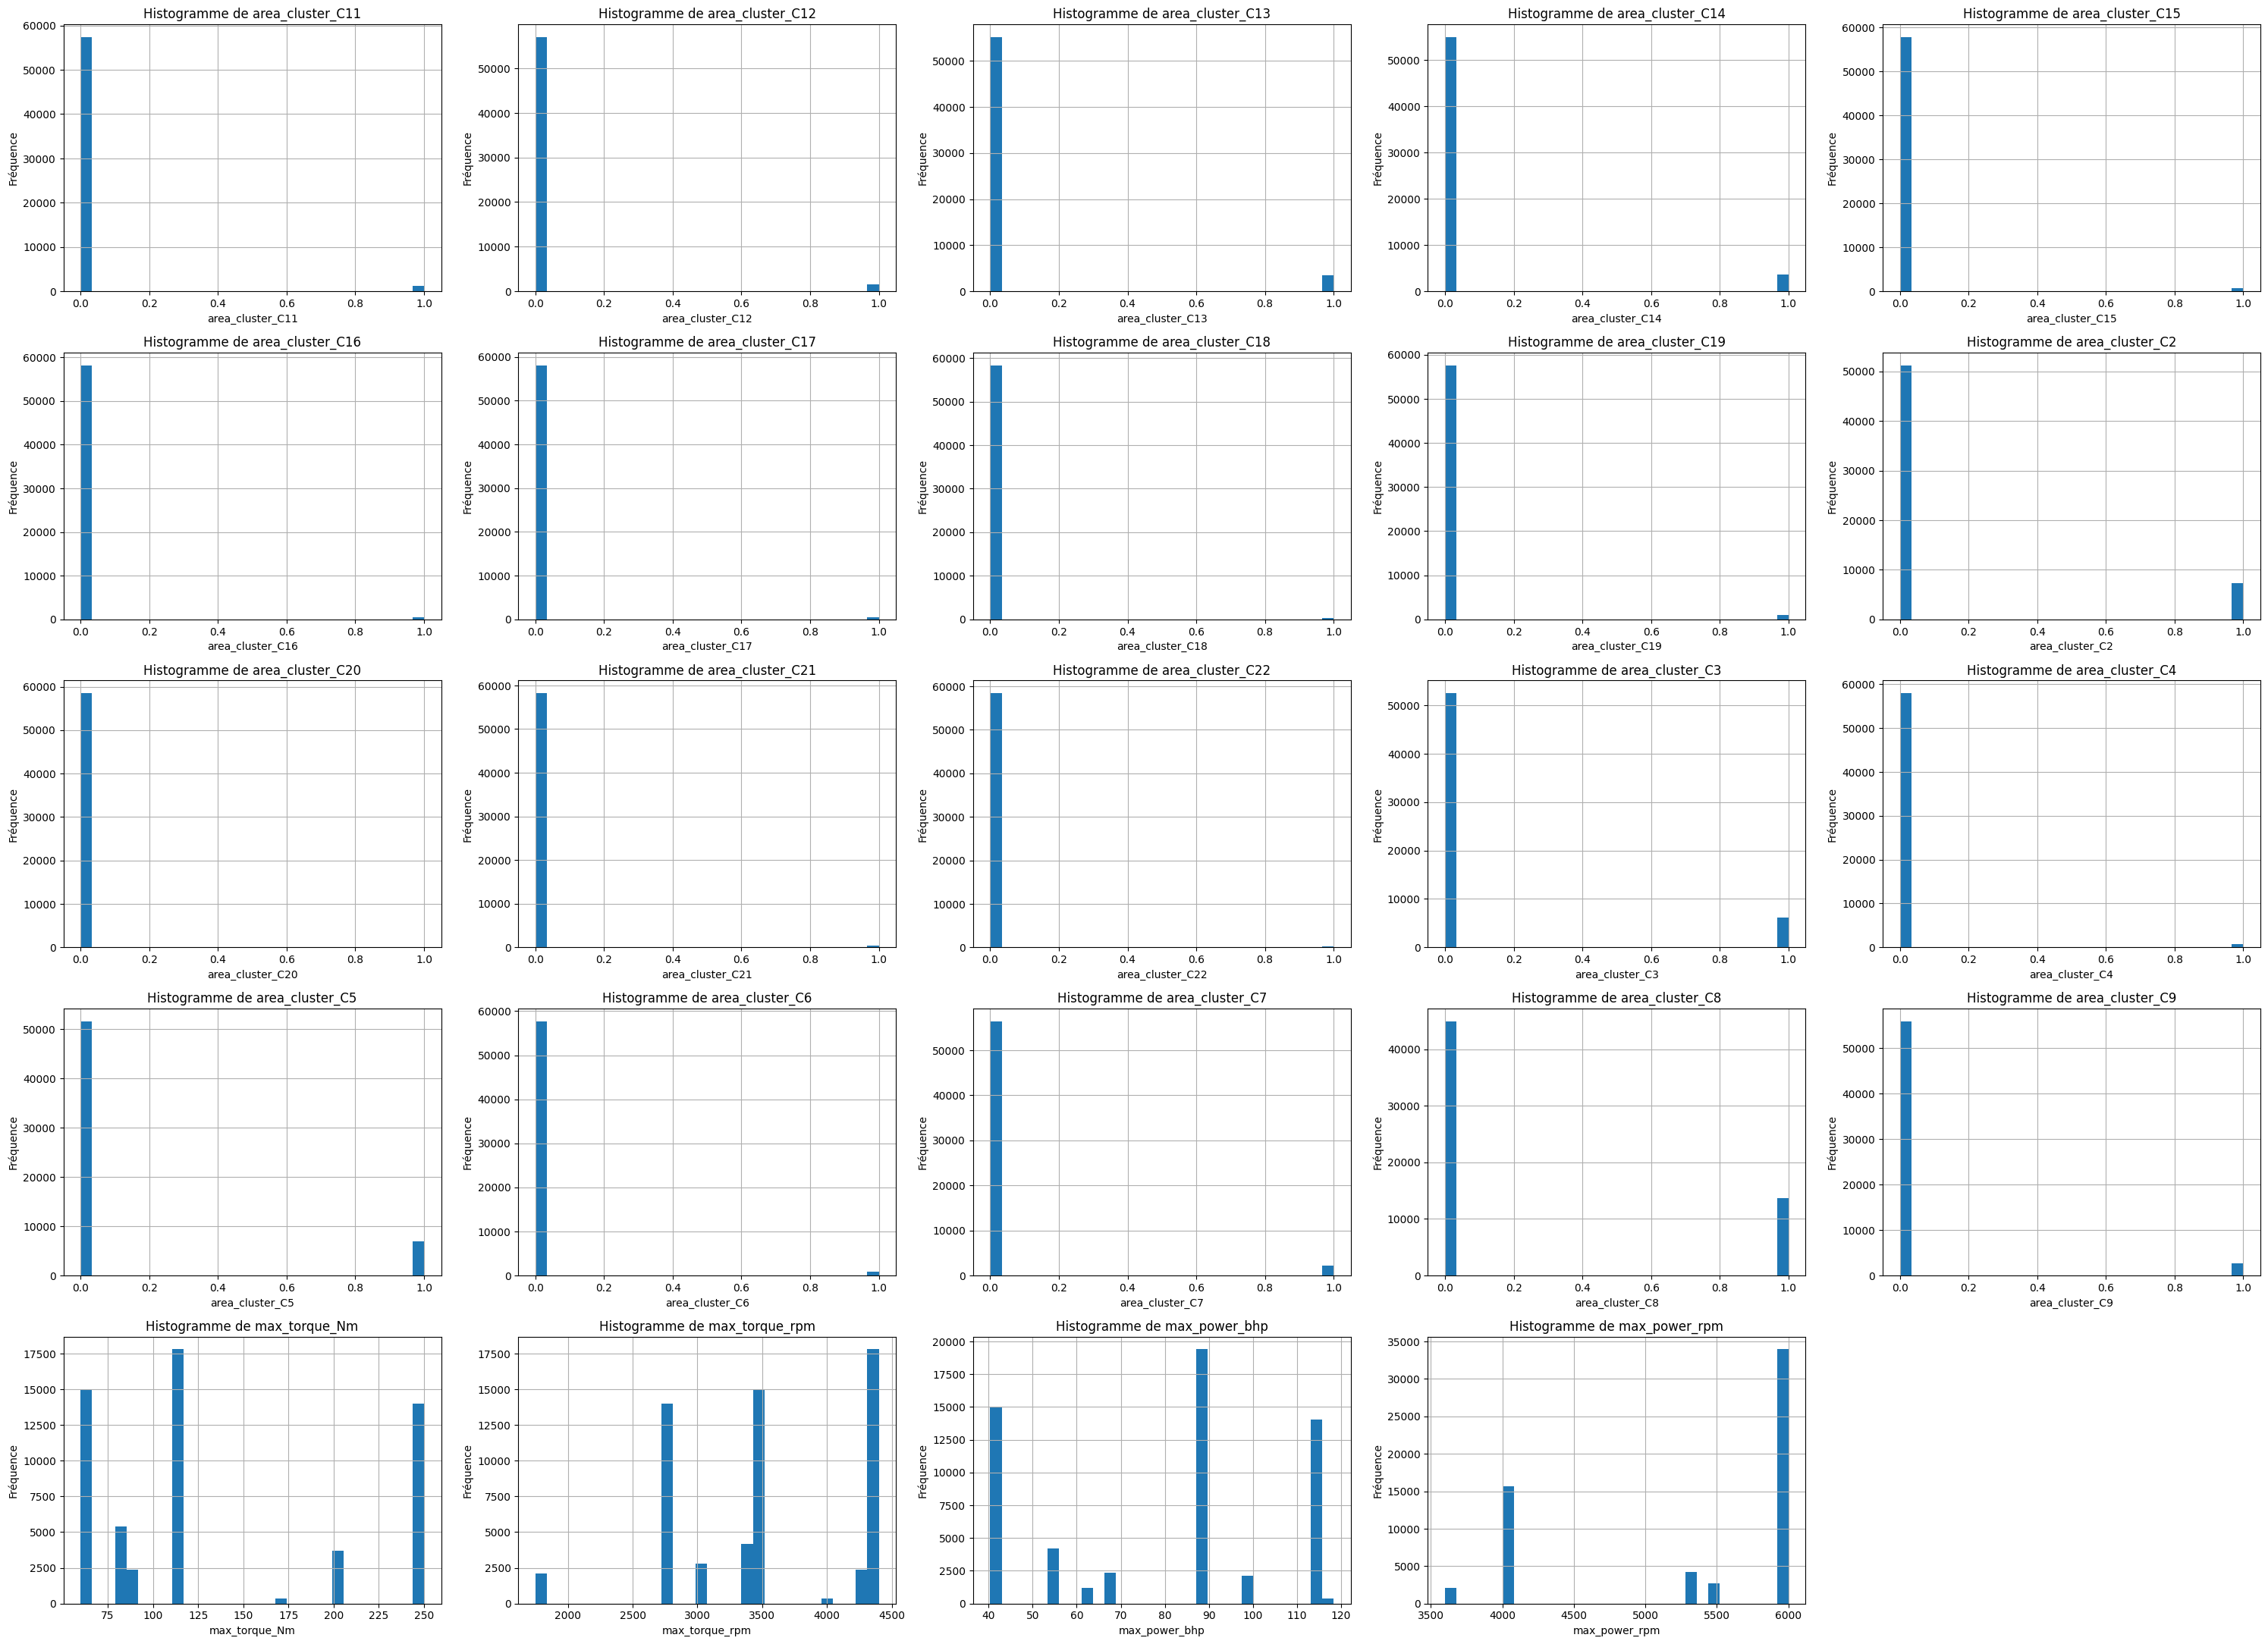

In [ ]:
for i in range(0, len(numerical_df.columns), 5*7):
    plt.figure(figsize=(30, 30))
    for j in range(0, 5*7):
        if i + j < len(numerical_df.columns):
            plt.subplot(7, 5, j+1)
            numerical_df[numerical_df.columns[i+j]].hist(bins=30)
            plt.title(f'Histogramme de {numerical_df.columns[i+j]}')
            plt.xlabel(numerical_df.columns[i+j])
            plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show() 

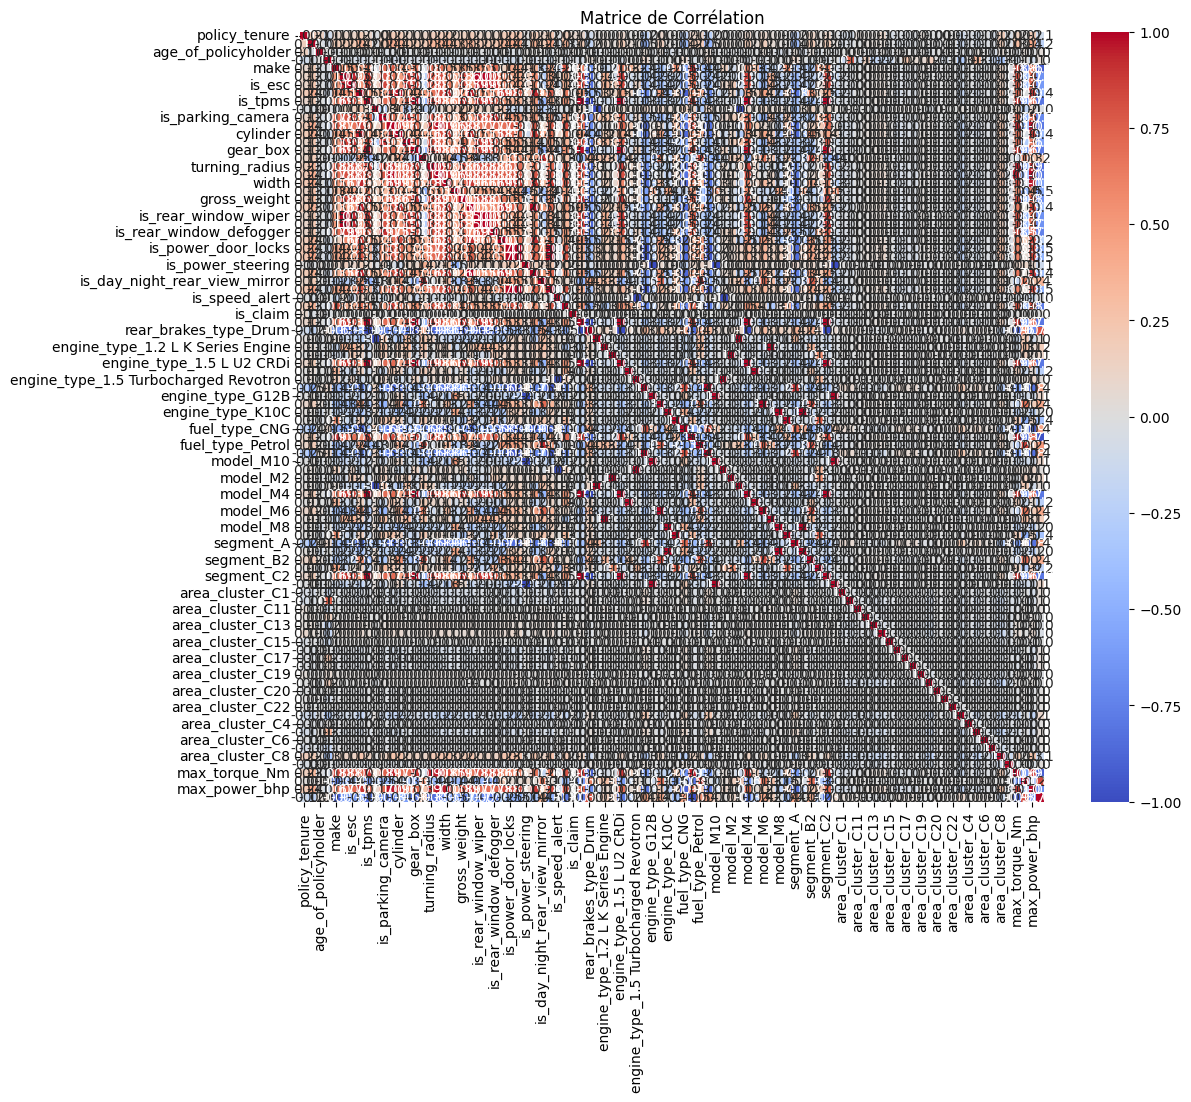

In [ ]:
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

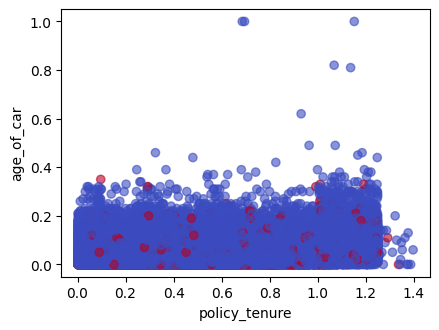

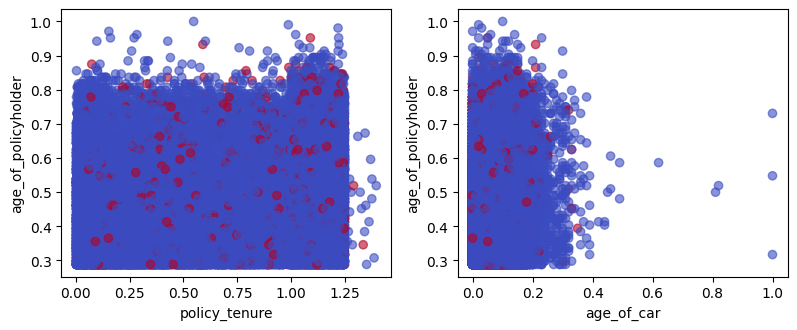

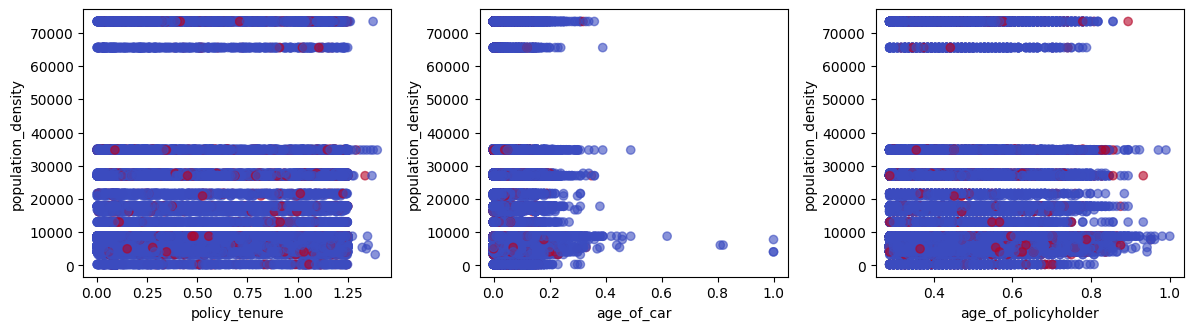

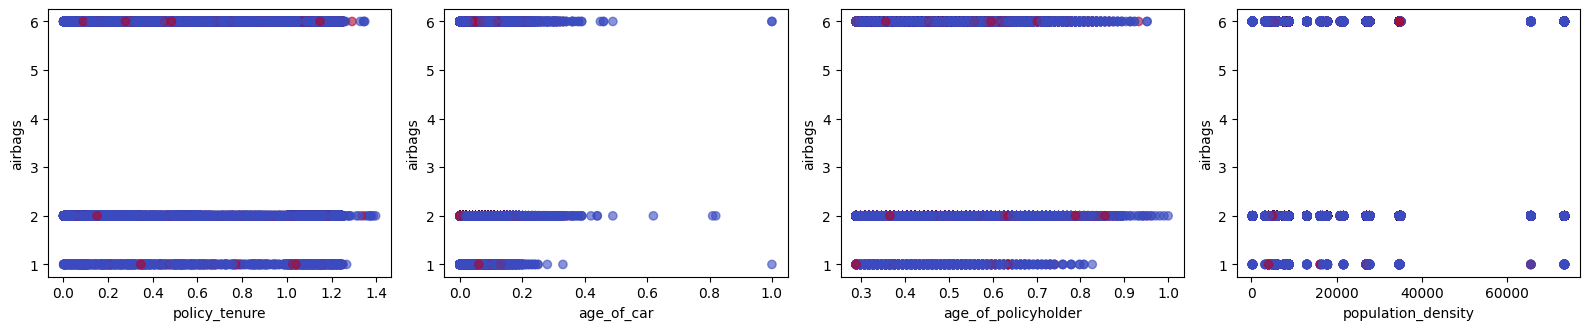

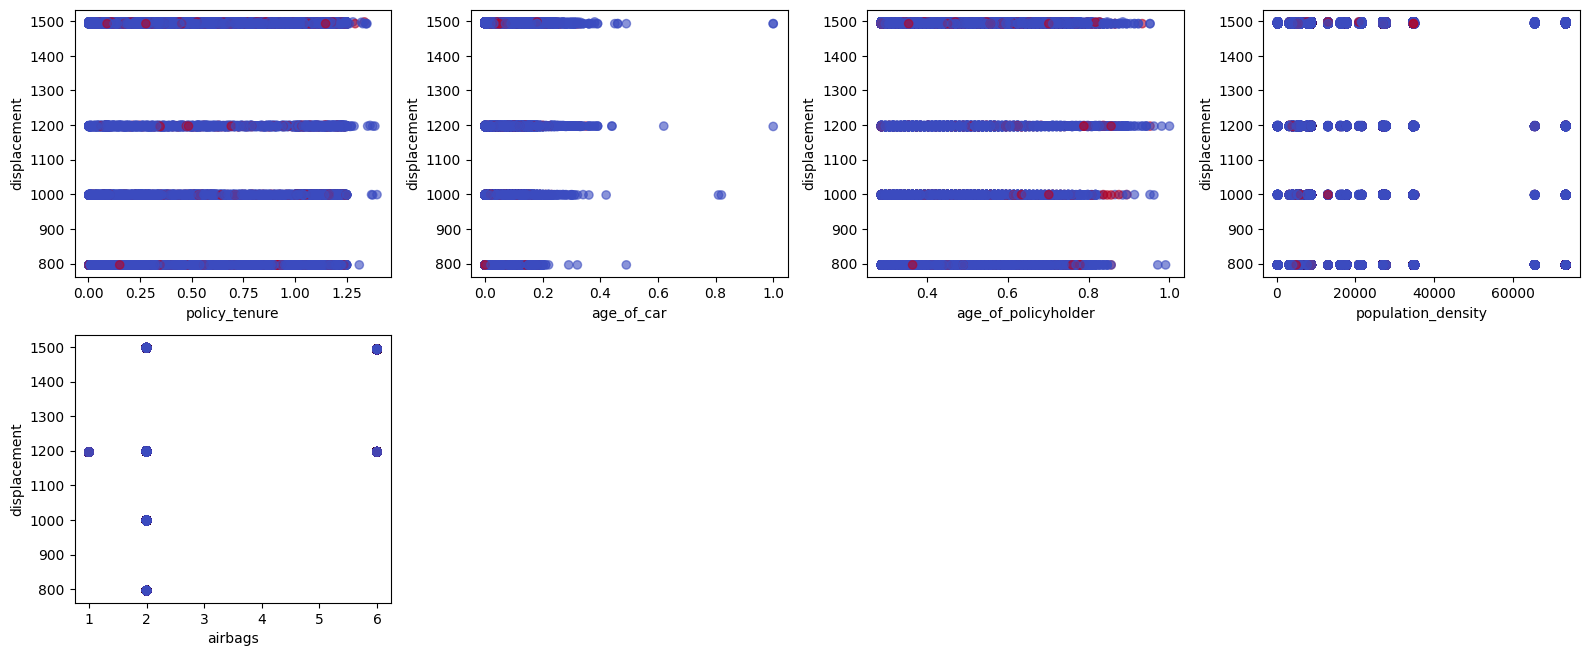

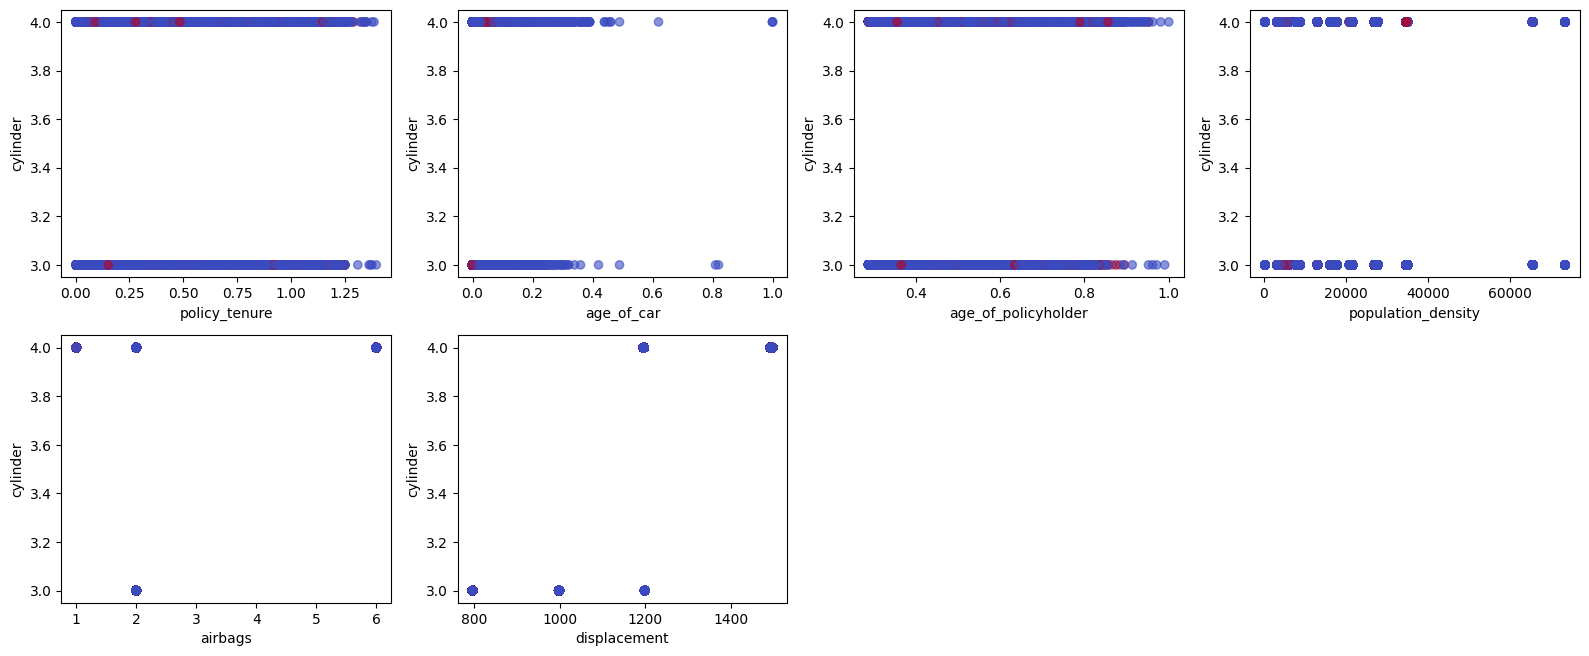

KeyboardInterrupt: 

In [ ]:
cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density',
                     'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius',
                     'length', 'width', 'height', 'gross_weight', 'ncap_rating']

for i in range(0, len(cols)):
    for j in range(0, len(numerical_df.columns), 3*4):
        if j < i:
            plt.figure(figsize=(16, 16))
            for k in range(0, 5*4):
                if j + k < i:
                    plt.subplot(5, 4, k+1)
                    plt.scatter(numerical_df[cols[j+k]], numerical_df[cols[i]], c=numerical_df['is_claim'], cmap='coolwarm', alpha=0.6)
                    plt.xlabel(numerical_columns[j+k])
                    plt.ylabel(numerical_columns[i])
            plt.tight_layout()
            plt.show()


In [ ]:
cols = ['is_parking_sensors', 'is_adjustable_steering', 
               'is_esc', 'is_tpms', 'is_parking_camera','is_front_fog_lights', 
               'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 
               'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
               'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw',
               'is_speed_alert']

print(df['is_claim'].mean())
for i in range(0, len(cols)):
    for j in range(0, len(numerical_df.columns), 3*4):
        if j < i:
            plt.figure(figsize=(16, 16))
            for k in range(0, 5*4):
                if j + k < i:
                    plt.subplot(5, 4, k+1)
                    count_matrix = [
                        [df[(df[cols[i]] == 1) & (df[cols[j+k]] == 1)].is_claim.mean(), df[(df[cols[i]] == 1) & (df[cols[j+k]] == 0)].is_claim.mean()],
                        [df[(df[cols[i]] == 0) & (df[cols[j+k]] == 1)].is_claim.mean(), df[(df[cols[i]] == 0) & (df[cols[j+k]] == 0)].is_claim.mean()]
                    ]
                    count_matrix = np.array(count_matrix)
                    x_labels = ["1", "0"]
                    y_labels = ["1", "0"]
                    sns.heatmap(count_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.1)
                    plt.xlabel(cols[j+k])
                    plt.ylabel(cols[i])
                    plt.title('claim %')
            plt.tight_layout()
            plt.show()

# Models

## preprocessing training data

In [14]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58592 entries, ID00001 to ID58592
Data columns (total 94 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  int64  
 4   make                                   58592 non-null  int64  
 5   airbags                                58592 non-null  int64  
 6   is_esc                                 58592 non-null  int64  
 7   is_adjustable_steering                 58592 non-null  int64  
 8   is_tpms                                58592 non-null  int64  
 9   is_parking_sensors                     58592 non-null  int64  
 10  is_parking_camera                      58592 non-null  int64  
 11 

In [17]:
interesting_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']
interesting_df = numerical_df#[interesting_columns]

from sklearn.preprocessing import MinMaxScaler

x_train = interesting_df.drop('is_claim', axis=1)
y_train = interesting_df['is_claim']

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

## KNN

### Training

In [16]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# accuracy on X_test
accuracy = knn.score(x_test, y_test)

print(accuracy)
# print("Classification Report:\n", classification_rep)
from sklearn.metrics import classification_report
y_pred = knn.predict(x_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

KeyboardInterrupt: 

### evaluating

Text(0.5, 1.0, 'Confusion Matrix')

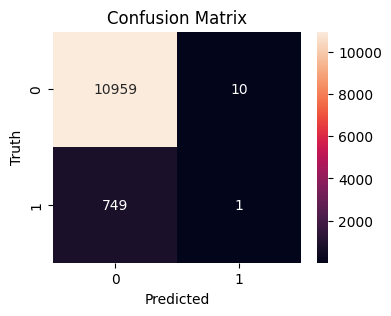

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [ ]:
#print the number of columns
print(len(df.columns))

94


# NN

In [ ]:
# use SMOTE on x_train and y_train
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.2)
x_train, y_train = sm.fit_resample(x_train, y_train)

from collections import Counter
print('After SMOTE:', Counter(y_train))

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

After SMOTE: Counter({0: 43875, 1: 8775})


In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
x_train, y_train = rus.fit_resample(x_train, y_train)

from collections import Counter
print('After RandomUnderSampler:', Counter(y_train))

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (C:\Users\nchre\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py)

In [ ]:
# train a tensorflow model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    # input layer : 95
    keras.layers.Dense(93, input_shape=(None,93), activation='relu'),
    keras.layers.Dense(93, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(93*93, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(93*93, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(4092, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

er= EarlyStopping(monitor='val_accuracy',mode='auto',verbose=0,patience=7)
mc =ModelCheckpoint('model_best_7.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 256
EPOCHS = 100


history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=[mc,er])

model.evaluate(x_test, y_test)

Epoch 1/100
206/206 [==============================] - ETA: 0s - loss: 0.6468 - accuracy: 0.8040
Epoch 1: val_accuracy improved from -inf to 0.80365, saving model to model_best_7.h5
206/206 [==============================] - 20s 87ms/step - loss: 0.6468 - accuracy: 0.8040 - val_loss: 0.3992 - val_accuracy: 0.8037
Epoch 2/100
206/206 [==============================] - ETA: 0s - loss: 0.4729 - accuracy: 0.8292
Epoch 2: val_accuracy improved from 0.80365 to 0.93600, saving model to model_best_7.h5
206/206 [==============================] - 19s 92ms/step - loss: 0.4729 - accuracy: 0.8292 - val_loss: 0.3051 - val_accuracy: 0.9360
Epoch 3/100
206/206 [==============================] - ETA: 0s - loss: 0.4552 - accuracy: 0.8317
Epoch 3: val_accuracy did not improve from 0.93600
206/206 [==============================] - 17s 81ms/step - loss: 0.4552 - accuracy: 0.8317 - val_loss: 0.3599 - val_accuracy: 0.9360
Epoch 4/100
206/206 [==============================] - ETA: 0s - loss: 0.4573 - accura

[0.28846055269241333, 0.9360013604164124]

In [ ]:
model.compile(optimizer='SGD',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

model.evaluate(x_test, y_test)

Epoch 1/3
1646/1646 [==============================] - 45s 26ms/step - loss: 0.4370 - accuracy: 0.8333
Epoch 2/3
1646/1646 [==============================] - 45s 27ms/step - loss: 0.4371 - accuracy: 0.8333
Epoch 3/3
367/367 [==============================] - 4s 10ms/step - loss: 0.2930 - accuracy: 0.9360


[0.29297709465026855, 0.9360013604164124]

In [ ]:
model = load_model('model_best_7.h5')

In [ ]:
y_pred = model.predict(x_test)
y_pred = np.ravel(y_pred)
y_pred = np.round(y_pred, 0)


367/367 [==============================] - 3s 8ms/step


Text(0.5, 1.0, 'Confusion Matrix')

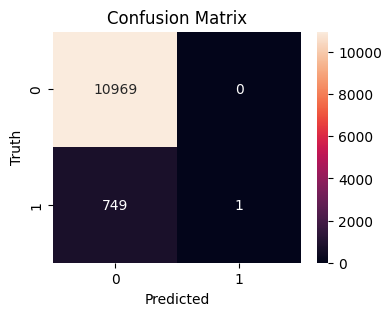

In [ ]:
# import confusion mmatrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

### optimizing columns

In [ ]:
# ne run que sur un df avec peu de colonnes
"""
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=42, n_jobs=5)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=interesting_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()

plt.show()
"""

'\nfrom sklearn.inspection import permutation_importance\n\nresult = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=42, n_jobs=5)\nsorted_idx = result.importances_mean.argsort()\n\nfig, ax = plt.subplots()\nax.boxplot(result.importances[sorted_idx].T, vert=False, labels=interesting_df.columns[sorted_idx])\nax.set_title("Permutation Importances (test set)")\nfig.tight_layout()\n\nplt.show()\n'